In [10]:
import re
from pathlib import Path
import tqdm

In [12]:
all_targets = [
    "bace",
    "cdk2",
    "jnk1",
    "mcl1",
    "p38",
    "ptp1b",
    "thrombin",
    "tyk2",
    "cdk8",
    "cmet",
    "eg5",
    "hif2a",
    "shp2",
    "syk",
    "pfkfb3",
    "tnks2",
]

pattern = re.compile(r"^\s*(\d+)\s+(\d+)\s+= Total no\. of atoms, no\. of solute atoms")
files = sorted(Path().glob("../perturbations/*/*/*/inputfiles/dualtop.top"))
alldata = []

for idx, file_path in tqdm.tqdm(enumerate(files), total=len(files)):

    n_atoms = n_solute = None

    target = file_path.parents[3].name
    edge_name = file_path.parents[1].name.replace("FEP_", "")
    system = file_path.parents[2].name.split(".")[1]

    for line in file_path.open():
        match = pattern.match(line)
        if match:
            n_atoms = int(match.group(1))
            n_solute = int(match.group(2))
            break  # Stop reading after finding the match

    alldata.append([target, edge_name, system, n_atoms, n_solute])

  0%|          | 0/1320 [00:00<?, ?it/s]

100%|██████████| 1320/1320 [00:00<00:00, 23960.29it/s]


In [14]:
import pandas as pd

df = pd.DataFrame(alldata, columns=["target", "edge_name", "system", "n_atoms", "n_solute"])

/tmp/ipykernel_1460525/435994718.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


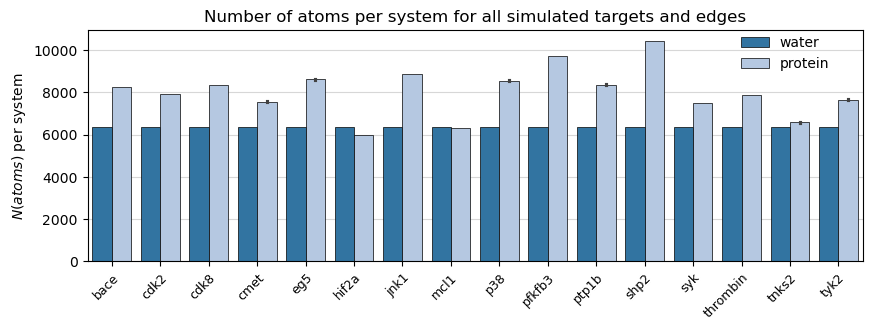

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

palette = "tab20"
fig, ax = plt.subplots(figsize=(10, 3))

metrics = ["KTAU", "MUE"]

barplot = sns.barplot(
    df,
    hue="system",
    x="target",
    y="n_atoms",
    ax=ax,
    palette=palette,
    edgecolor="black",
    linewidth=0.5,
)
# for idx, bar in enumerate(barplot.patches):
#     x_bar = bar.get_x() + bar.get_width() / 2
#     y_bar = bar.get_height()

#     # try:
#     #     yerr = [[error_values[0, idx]], [error_values[1, idx]]]
#     # except IndexError:
#     #     break

#     # Add error bars with the correct shape
#     ax.errorbar(
#         x_bar,
#         y_bar,
#         yerr=np.array(yerr).reshape(2, 1),
#         color="black",
#         fmt="none",
#         elinewidth=1,
#         capsize=3,
#         alpha=0.5,
#     )

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    ha="right",
    rotation_mode="anchor",
    fontsize=9,
)
ax.set_title(
    "Number of atoms per system for all simulated targets and edges",
)
# ax.legend(bbox_to_anchor=(1.02, -0.45), loc="lower left", borderaxespad=0, frameon=False)
ax.set_ylabel(r"Kendall $\tau$")
ax.legend().set_visible(False)
ax.legend(
    loc="upper center",
    bbox_to_anchor=(0.9, 1.03),
    frameon=False,
    shadow=True,
    ncol=1,
)
ax.set_ylabel("$N(atoms)$ per system")
ax.set_xlabel("")
ax.grid(axis="y", alpha=0.5)
ax.set_axisbelow(True)
# fig.tight_layout()
plt.subplots_adjust(hspace=0.4)
# fig.savefig("all_metrics_2colLegend.svg", bbox_inches="tight")
plt.show()